In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess

In [2]:
def filter_by_elo(games, min_elo=0, max_elo=3000):
    filtered_games = games[(games["white_rating"] <= max_elo) & (games["black_rating"] <= max_elo)]
    filtered_games = filtered_games.reset_index(drop=True)
    filtered_games = filtered_games[(min_elo <= filtered_games["white_rating"]) & (min_elo <= games["black_rating"])]
    filtered_games = filtered_games.reset_index(drop=True)
    return filtered_games

In [62]:
games = pd.read_csv("games.csv")
games.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
high_rated_games = filter_by_elo(games, min_elo=1600)
high_rated_games.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,h1unxHlo,True,1.504200e+12,1.504200e+12,113,draw,draw,15+0,avelez8,1745,anonymous1705,1714,d4 d5 c4 Nf6 Nc3 Bf5 Bf4 a6 Nf3 e6 a3 Nc6 e3 B...,D06,Queen's Gambit Refused: Marshall Defense,4
1,OIyTAHCP,True,1.504190e+12,1.504190e+12,62,resign,white,15+0,avelez8,1734,ars01,1748,d4 d5 c4 Nf6 Nc3 dxc4 e3 Be6 Nf3 a6 b3 cxb3 ax...,D06,Queen's Gambit Refused: Marshall Defense,4
2,bnCnIJSz,True,1.503540e+12,1.503550e+12,101,resign,white,10+0,salah04,1942,avelez8,1739,e4 e6 d4 d5 Nc3 c5 exd5 exd5 Nf3 Nc6 Bb5 Nf6 O...,C10,French Defense: Marshall Variation,6


In [4]:
opening_move = games[games["turns"] > 1].reset_index(drop=True).loc[:, ["white_rating", "moves"]]
opening_move['moves'] = opening_move['moves'].apply(lambda s: s[:s.find(' ')])
opening_move

,white_rating,moves
0,1500,d4
1,1322,d4
2,1496,e4
3,1439,d4
4,1523,e4
...,...,...
20035,1691,d4
20036,1233,d4
20037,1219,d4
20038,1360,e4


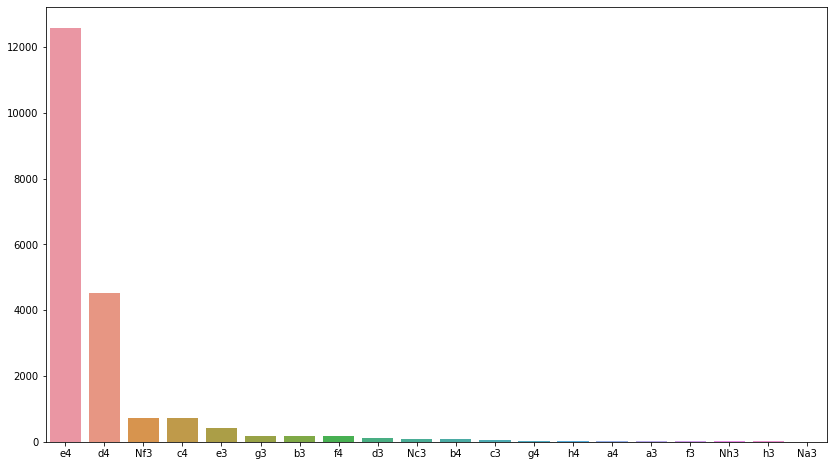

In [6]:
move_frequencies = opening_move['moves'].value_counts()

fig = plt.figure(figsize=(14, 8))
sns.barplot(x = move_frequencies.keys(), y = move_frequencies.array)

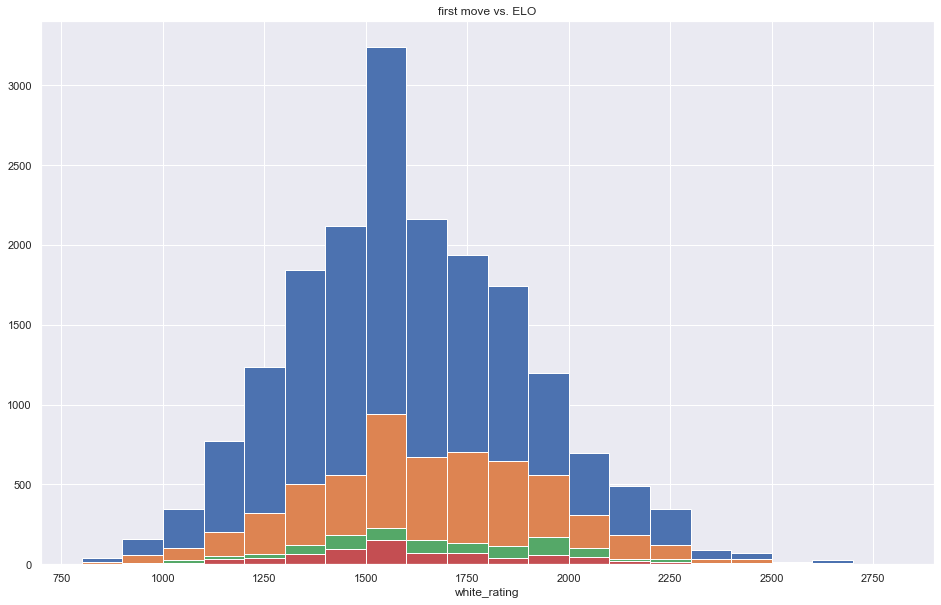

In [20]:
sns.set_palette("twilight_shifted_r")
sns.set()

top_4_opens = [opening_move[opening_move['moves'] == i]["white_rating"] for i in move_frequencies.keys()[:4]]

cumulative_opens = [top_4_opens[3].copy()]

for i in range(1, 4):
    c = cumulative_opens[i-1].append(top_4_opens[3-i].copy())
    cumulative_opens.append(c)
    
fig, ax = plt.subplots(1,1, figsize=(16,10))
ax.set_title("first move vs. ELO")

for i in range(4):
    ax = sns.distplot(cumulative_opens[3-i], 20,  kde=False, hist_kws={"alpha": 1, "range": (800, 2800)})

In [22]:
filtered_games_1 = filter_by_elo(games, max_elo=1200)


D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


635

In [26]:
filtered_games_1.keys()

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [8]:
games["moves"][0]

'd4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'

In [40]:
def string_to_moves(string):
    
    moves = []
    
    while " " in string:        
        ind = string.find(" ")
        moves.append(string[0 : ind])
        string = string[ind+1:]
    moves.append(string)
    return moves

def move_of_first_capture(moves):
    i = 1
    
    for move in moves:
        if "x" in move:
            return i
        i += 1
    
    return 0

def movestring_to_game(movestring):
    moves = string_to_moves(movestring)
    game = chess.Board()
    
    for move in moves:
        game.push_san(move)
        
    return game

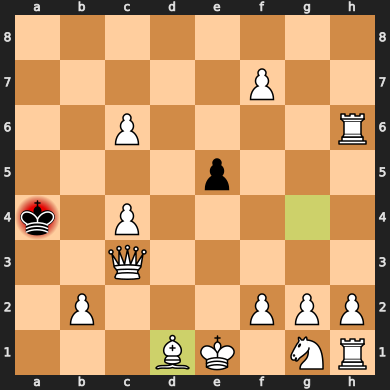

In [32]:
test_board = movestring_to_game(games["moves"][2])
test_board

In [41]:
move_of_first_capture(string_to_moves(games["moves"][2]))

13

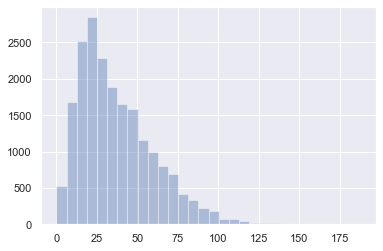

In [78]:
capture_data = games.loc[:, "moves"].apply(lambda x: move_of_first_capture(x)).array

sns.set()
sns.distplot(capture_data, bins=30, kde=False)